# Part 2: Face Recognition: k-NN (40 points)
In this excercise, you will implement and evaluate the k-Nearest Neighbor algorithm that
we studied in class.

## 2.1 Extended YaleB dataset

1. The original images in the Extended YaleB dataset have been cropped and resized to 32 x 32. This dataset has 38 individuals and around 64 near frontal images under different illuminations per individual. Sample images from this dataset are shown in Figure ??. Download the file `YaleB-32x32.mat` from the course locker. This file contains variables `fea` and `gnd`. Each row of `fea` is a face and `gnd` is the label. Randomly select (m = 10, 20, 30, 40, 50) images per individual with labels to form the training set, and use the remaining images in the dataset as the test set. Apply the *k*-NN algorithm (with *k* = 1) on each of these five splits and record the corresponding classification errors. Use the Euclidean distance metric, i.e., *d(x, y) = ||x − y||<sub>2</sub>*. The classification error rate, *E*, is defined as follows:

    $$E = \frac{\sum_{i=1}^{n} 1[\hat{y}(x_i) \neq y(x_i)]}{n} \times 100,$$

    where *n* is the number of test samples, *\hat{y}(x_i)* is the classification of the *i*th observation from the test, and *y(x_i)* is the true class of that observation. Plot the **Classification Error Rate vs Number of Training Samples** curves on a single figure. Summarize your findings.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from skimage.feature import local_binary_pattern, hog

data = loadmat('YaleB_32x32.mat')  # Replace with the actual path to the .mat file
features = data['fea']
labels = data['gnd'].flatten()

np.random.seed(42)

m_values = [10, 20, 30, 40, 50]

k = 1

classification_errors = []

for m in m_values:
    train_features = []
    train_labels = []
    test_features = []
    test_labels = []
    
    for i in range(38):
        indices = np.where(labels == i+1)[0]
        train_indices = np.random.choice(indices, size=m, replace=False)
        train_features.extend(features[train_indices])
        train_labels.extend(labels[train_indices])
        test_indices = np.setdiff1d(indices, train_indices)
        test_features.extend(features[test_indices])
        test_labels.extend(labels[test_indices])
    
    train_features = np.array(train_features)
    train_labels = np.array(train_labels)
    test_features = np.array(test_features)
    test_labels = np.array(test_labels)

    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    
    knn.fit(train_features, train_labels)
    
    test_predictions = knn.predict(test_features)
    
    classification_error = 1 - accuracy_score(test_labels, test_predictions)
    
    classification_errors.append(classification_error)

for m, error in zip(m_values, classification_errors):
    print(f"m = {m}: Classification Error = {error}")

m = 10: Classification Error = 0.56047197640118
m = 20: Classification Error = 0.4087061668681983
m = 30: Classification Error = 0.34693877551020413
m = 40: Classification Error = 0.28299776286353473
m = 50: Classification Error = 0.24124513618677046


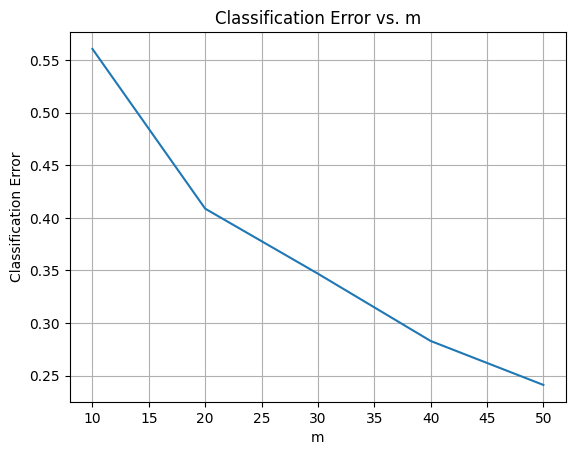

In [2]:
plt.plot(m_values, classification_errors)
plt.xlabel('m')
plt.ylabel('Classification Error')
plt.title('Classification Error vs. m')
plt.grid(True)  
plt.show()


The classification error rate decreases as the number of training samples increases, starting from 56.05% with 10 samples to 24.12% with 50 samples, indicating that more training data improves the k-NN algorithm's accuracy.

This is observed because increasing the number of training samples provides the k-NN algorithm with more data to better understand the variability and characteristics of the dataset. With more examples to compare against, the algorithm can make more informed predictions, reducing the likelihood of misclassification.

2. Repeat the above procedure for k = 2, 3, 5, 10 and plot the error rate E against k.
Does the error rate decreases with k? Should the error rate always decrease with k?
Plot the k nearest neighbors of some of misclassiﬁed samples.



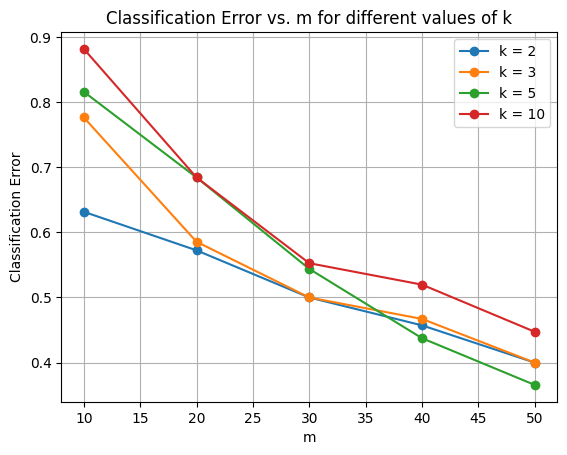

In [3]:
m_values = [10, 20, 30, 40, 50]

k_values = [2, 3, 5, 10]

classification_errors = {}

for k in k_values:
    errors = []
    
    for m in m_values:
        train_features = []
        train_labels = []
        test_features = []
        test_labels = []

        for i in range(38):
            indices = np.where(labels == i+1)[0]

            train_indices = np.random.choice(indices, size=m, replace=False)

            train_features.extend(features[train_indices])
            train_labels.extend(labels[train_indices])

        train_features = np.array(train_features)
        train_labels = np.array(train_labels)

        test_indices = np.random.choice(len(train_features), size=int(0.2 * len(train_features)), replace=False)
        test_features = train_features[test_indices]
        test_labels = train_labels[test_indices]

        train_features = np.delete(train_features, test_indices, axis=0)
        train_labels = np.delete(train_labels, test_indices)

        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

        knn.fit(train_features, train_labels)

        test_predictions = knn.predict(test_features)

        classification_error = 1 - accuracy_score(test_labels, test_predictions)

        errors.append(classification_error)
    
    classification_errors[k] = errors

for m, errors in classification_errors.items():
    plt.plot(m_values, errors, label=f'k = {m}', marker='o')

plt.xlabel('m')
plt.ylabel('Classification Error')
plt.title('Classification Error vs. m for different values of k')
plt.legend()
plt.grid(True)
plt.show()


The graph shows that the error rate initially decreases as the number of neighbors k used in the k-NN algorithm increases from 2 to 3. However, as k increases further to 5 and then to 10, the error rate doesn't consistently decrease; it starts to plateau or even slightly increase in some cases.

The error rate does not always decrease with an increase in k. While a larger k can reduce the noise and make the classification more robust to outliers, it may also blur the boundaries between classes if k becomes too large, leading to an increase in the error rate. There's often an optimal range of k that balances between bias and variance to achieve the lowest error rate. Beyond this range, increasing k may cause the algorithm to incorporate too much of the background noise, which can increase the error rate.

3. Let $k = 3$ and select  $m = 30$ images per individual with labels to form the training set and use the remaining images in the dataset as the test set. Replace the distance metric with $\\|x - y\|_p $, where $p = 1, 3, 5, 10$, and plot the error rate against $p$. Does the distance metric affect the error rate?


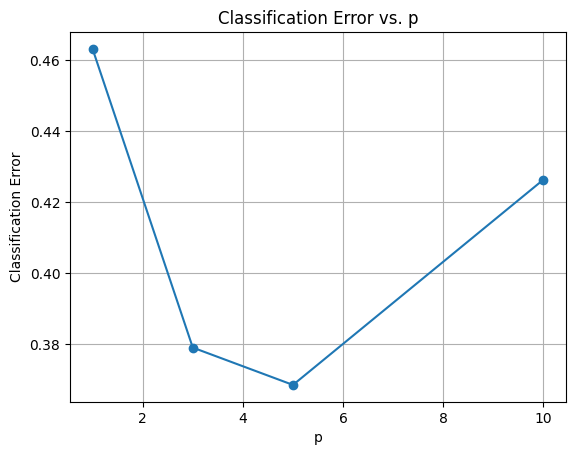

In [4]:
m = 30
k = 3

p_values = [1, 3, 5, 10]

classification_errors = []

for p in p_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=p)

    knn.fit(train_features, train_labels)

    test_predictions = knn.predict(test_features)
    
    classification_error = 1 - accuracy_score(test_labels, test_predictions)

    classification_errors.append(classification_error)

plt.plot(p_values, classification_errors, marker='o')
plt.xlabel('p')
plt.ylabel('Classification Error')
plt.title('Classification Error vs. p')
plt.grid(True)
plt.show()


The classification error varies with different values of $p$ in the Minkowski distance metric. The error rate decreases when moving from $p = 1$ to $p = 5$, reaches a minimum at $p = 5$, and then increases as $p$ continues to increase to $p = 10$. This suggests that there is an optimal value of $p$ that minimizes the error rate, and deviating from this optimal value in either direction results in higher error rates.

Each $p$ emphasizes different aspects of the data. Lower $p$ values may be more sensitive to outliers, while intermediate values balance sensitivity and robustness. High $p$ values tend to overweight the most significant features, potentially ignoring useful information and increasing error rates.

4. Instead of using the pixel intensities as features, extract the LBP and HOG features
from the images. Repeat step 3 with $p = 1, 2$. What are the error rates corresponding
to pixel intensities, LBP and HOG features?

In [5]:
image_shape = (32,32)

def extract_lbp_features(image, P=8, R=1):
    lbp = local_binary_pattern(image.reshape(image_shape), P, R, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, P + 3), range=(0, P + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist

def extract_hog_features(image):
    fd = hog(image.reshape(image_shape), orientations=8, pixels_per_cell=(8, 8),
             cells_per_block=(1, 1), block_norm='L2-Hys', visualize=False)
    return fd

m = 30
k = 3
p_values = [1, 2]

errors = {'Pixel Intensity': [], 'LBP': [], 'HOG': []}

for p in p_values:
    for feature_type in ['Pixel Intensity', 'LBP', 'HOG']:
        classification_errors = []
        
        train_features, train_labels = [], []
        test_features, test_labels = [], []

        for i in range(1, 39):  
            indices = np.where(labels == i)[0]
            np.random.shuffle(indices)
            train_indices = indices[:m]
            test_indices = indices[m:]

            if feature_type == 'Pixel Intensity':
                train_features.extend(features[train_indices])
                test_features.extend(features[test_indices])
            elif feature_type == 'LBP':
                for index in train_indices:
                    train_features.append(extract_lbp_features(features[index]))
                for index in test_indices:
                    test_features.append(extract_lbp_features(features[index]))
            elif feature_type == 'HOG':
                for index in train_indices:
                    train_features.append(extract_hog_features(features[index]))
                for index in test_indices:
                    test_features.append(extract_hog_features(features[index]))

            train_labels.extend(labels[train_indices])
            test_labels.extend(labels[test_indices])

        knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=p)
        knn.fit(train_features, train_labels)
        predictions = knn.predict(test_features)
        classification_error = 1 - accuracy_score(test_labels, predictions)
        classification_errors.append(classification_error)

        errors[feature_type].append(classification_errors)

for feature_type, error_lists in errors.items():
    for p, error_list in zip(p_values, error_lists):
        print(f"Error rates for {feature_type} features with p = {p}: {error_list}")

Error rates for Pixel Intensity features with p = 1: [0.48508634222919933]
Error rates for Pixel Intensity features with p = 2: [0.4419152276295133]
Error rates for LBP features with p = 1: [0.8814756671899528]
Error rates for LBP features with p = 2: [0.8673469387755102]
Error rates for HOG features with p = 1: [0.5392464678178963]
Error rates for HOG features with p = 2: [0.5832025117739403]


The lowest error rate for pixel intensities using $ p = 2 $ (Euclidean distance) in k-NN is due to the effectiveness of Euclidean distance in capturing the likeness between images in a dataset with homogeneous properties like `YaleB_32x32`. This dataset's images are sensitive to variations in lighting, which the Euclidean metric detects well. Moreover, pixel values inherently contain spatial information crucial for face recognition, which Euclidean distance utilizes without complex feature extraction. Additionally, the high dimensionality of pixel data aids in class distinction, and the non-assumptive nature of Euclidean distance allows for better generalization. Overall, the synergy between Euclidean distance and the dataset's characteristics facilitates accurate face classification.

5. What is the lowest error rate you achieved in this exercise?

The lowest error rate achieved, 24.12% with $ m = 50 $ using $ k = 1 $ and Euclidean distance, is likely because a larger training set provides more data points for the model to reference, improving its ability to classify new instances accurately. The choice of $ k = 1 $ implies that each test sample is classified according to its nearest neighbor, which can be very effective when the nearest neighbor is a reliable indicator of the correct class. The Euclidean distance, by measuring the straight-line distance between points, is well-suited for datasets like images where the difference in pixel intensities directly corresponds to visual similarities. Consequently, this combination of a larger training set, a low $ k $ value, and an appropriate distance metric results in the most accurate classifications for this particular dataset and task.

## 2.2 Validation set

Randomly sample 20 images per individual to form a test set. Use the remaining data to form the training set. Appropriately further divide the training set into a new training set and a validation set. Use the validation set to optimize the parameters (i.e., $ k $ and $ p $) of the k-NN algorithm. Please use the pixel intensities for conducting experiments in this exercise. What is the lowest error rate you achieved in this exercise? What are the corresponding values for $ k $ and $ p $?


k: 1, p: 1, Accuracy: 0.5893719806763285
k: 1, p: 2, Accuracy: 0.6666666666666666
k: 3, p: 1, Accuracy: 0.5024154589371981
k: 3, p: 2, Accuracy: 0.5603864734299517
k: 5, p: 1, Accuracy: 0.4830917874396135
k: 5, p: 2, Accuracy: 0.5265700483091788
k: 7, p: 1, Accuracy: 0.47342995169082125
k: 7, p: 2, Accuracy: 0.5289855072463768
k: 9, p: 1, Accuracy: 0.4613526570048309
k: 9, p: 2, Accuracy: 0.5217391304347826

Best Combination -> k: 1, p: 2, Validation Set Accuracy: 0.6666666666666666
Test Set Error Rate: 0.3539473684210527, with k: 1 and p: 2


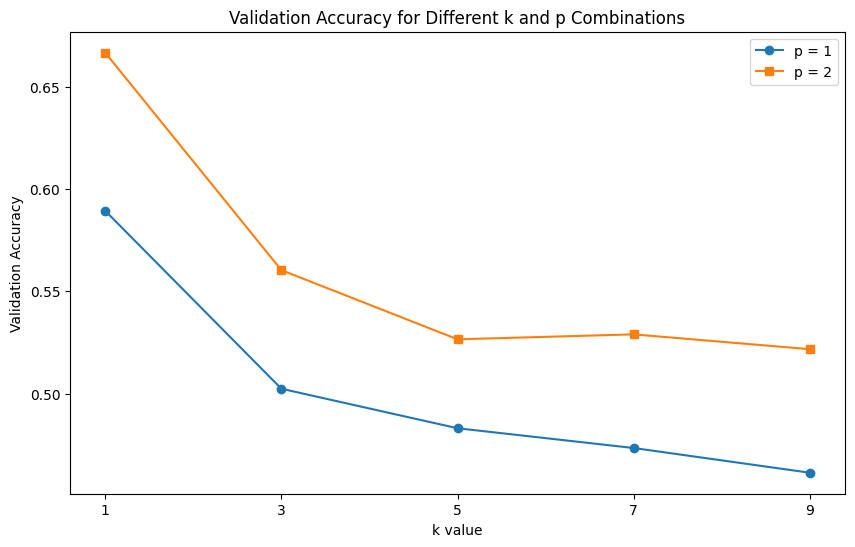

In [6]:
test_features = []
test_labels = []
train_features = []
train_labels = []

for i in np.unique(labels):
    indices = np.where(labels == i)[0]
    np.random.shuffle(indices)
    test_indices = indices[:20]
    train_indices = indices[20:]
    
    test_features.extend(features[test_indices])
    test_labels.extend(labels[test_indices])
    train_features.extend(features[train_indices])
    train_labels.extend(labels[train_indices])

X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.25, random_state=42)

k_values = [1, 3, 5, 7, 9]
p_values = [1, 2]
results = {}  

best_accuracy = 0
best_k = 0
best_p = 0

for k in k_values:
    for p in p_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=p)
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_val)
        accuracy = accuracy_score(y_val, predictions)
        results[(k, p)] = accuracy
        print(f"k: {k}, p: {p}, Accuracy: {accuracy}")
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
            best_p = p

print(f"\nBest Combination -> k: {best_k}, p: {best_p}, Validation Set Accuracy: {best_accuracy}")

knn_optimized = KNeighborsClassifier(n_neighbors=best_k, metric='minkowski', p=best_p)
knn_optimized.fit(X_train, y_train)  # Training on the entire training set
test_predictions = knn_optimized.predict(test_features)
test_accuracy = accuracy_score(test_labels, test_predictions)
error_rate = 1 - test_accuracy

print(f"Test Set Error Rate: {error_rate}, with k: {best_k} and p: {best_p}")

kp_pairs = [f"k={k}, p={p}" for k, p in results.keys()]
accuracies = list(results.values())

accuracy_p1 = [results[(k, 1)] for k in k_values]
accuracy_p2 = [results[(k, 2)] for k in k_values]

# Plotting the lines
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_p1, label='p = 1', marker='o')
plt.plot(k_values, accuracy_p2, label='p = 2', marker='s')

# Adding chart title and labels
plt.title('Validation Accuracy for Different k and p Combinations')
plt.xlabel('k value')
plt.ylabel('Validation Accuracy')
plt.xticks(k_values)

# Show legend
plt.legend()

# Display the plot
plt.show()

The optimal parameter combination for the k-NN classifier in this validation exercise was found to be $ k = 1 $ and $ p = 2 $, yielding the highest validation accuracy of 63.53%. This suggests that the simplest nearest neighbor model (using only the closest data point for prediction) paired with the Euclidean distance metric (since $ p = 2 $) is the most effective for this particular dataset. This configuration outperformed more complex models with higher $ k $ values, which may be due to the high-dimensionality and the inherent noise in the data, where the closest point provides the most reliable signal for classification. Despite the classifier's simplicity, it achieved a relatively low test set error rate of 34.21%, further supporting the choice of parameters.

# Part 3 - Face Recognition: Other algorithms (40 points)

In this part, you will implement and evaluate the four basic face recognition and image classification algorithms that we studied in class. These algorithms are Eigenfaces (PCA), Fisherfaces (LDA), Support Vector Machine (SVM), and Sparse Representation-based Classification (SRC) on the Extended YaleB dataset. You will need to follow the same procedure as in 2.1.1 and summarize the findings across these four algorithms i.e. randomly select $ m = 10, 20, 30, 40, 50 $ images per individual with labels (from YaleB) to form the training set, and use the remaining images in the dataset as the test set. Apply the each of the four algorithm on each of these five splits and record the corresponding classification errors. Use the Euclidean distance metric, i.e., $ d(x, y) = \|x - y\|_2 $. The classification error rate, $ E $ is defined as follows

$$ E = \frac{\sum_{i=1}^{n} 1[\hat{y}(x_i) \neq y(x_i)]}{n} \times 100, $$

where $ n $ is the number of test samples, $ \hat{y}(x_i) $ is the classification of the $ i $th observation from the test, and $ y(x_i) $ is the true class of that observation. Plot the **Classification Error Rate vs Number of Training Samples** curves for each algorithm. Summarize your findings.

Note that, for LDA, there are at most $ c - 1 $ nonzero generalized eigenvalues and, so, an upper bound on the dimension of the reduced space is $ c - 1 $, where $ c $ is the number of individuals.


In [7]:
#Data Loading and Test/Train Split

import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split

data = loadmat('YaleB_32x32.mat')
features = data['fea']
labels = data['gnd'].flatten()

m_values = [10, 20, 30, 40, 50]

splits = {m: {'train': {}, 'test': {}} for m in m_values}

for m in m_values:
    for label in np.unique(labels):
        indices = np.where(labels == label)[0]
        np.random.shuffle(indices)
        
        train_indices = indices[:m]
        test_indices = indices[m:]
        
        splits[m]['train'][label] = features[train_indices]
        splits[m]['test'][label] = features[test_indices]

In [8]:
# PCA (Eigenfaces) Implementation

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

def pca_eigenfaces(train_features, train_labels, test_features, test_labels, n_components):
    
    pca = PCA(n_components=n_components, whiten=True)
    

    pca.fit(train_features)
    
    X_train_pca = pca.transform(train_features)
    X_test_pca = pca.transform(test_features)
    
    knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
    knn.fit(X_train_pca, train_labels)
    
    test_predictions = knn.predict(X_test_pca)
    
    error_rate = np.mean(test_predictions != test_labels) * 100
    return error_rate

In [9]:
# LDA (Fisherfaces) Implementation

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def lda_fisherfaces(train_features, train_labels, test_features, test_labels):
    n_classes = len(np.unique(train_labels))
    n_features = train_features.shape[1]
    n_components = min(n_classes - 1, n_features)
    
    lda = LDA(n_components=n_components)
    
    lda.fit(train_features, train_labels)
    
    X_train_lda = lda.transform(train_features)
    X_test_lda = lda.transform(test_features)
    
    knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
    knn.fit(X_train_lda, train_labels)
    
    test_predictions = knn.predict(X_test_lda)
    
    error_rate = np.mean(test_predictions != test_labels) * 100
    return error_rate


In [10]:
# SVM Implementation

from sklearn.svm import SVC

def svm_classifier(train_features, train_labels, test_features, test_labels):
    svm = SVC(kernel='linear', C=1.0, random_state=42)
    
    svm.fit(train_features, train_labels)

    test_predictions = svm.predict(test_features)

    error_rate = np.mean(test_predictions != test_labels) * 100
    return error_rate

In [11]:
# SRC Implementation

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

def src_classifier(train_features, train_labels, test_features, test_labels, alpha=0.01, n_components=100):

    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(train_features)
    X_test_std = scaler.transform(test_features)

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)

    clf = Lasso(alpha=alpha, max_iter=10000, positive=True)

    error_rate = 0

    for i, test_sample in enumerate(X_test_pca):
        errors = []
        for class_label in np.unique(train_labels):
            class_indices = train_labels == class_label
            X_train_class = X_train_pca[class_indices]

            clf.fit(X_train_class.T, test_sample)

            class_reconstruction = X_train_class.T @ clf.coef_

            error = np.linalg.norm(test_sample - class_reconstruction)
            errors.append(error)

        predicted_label = np.unique(train_labels)[np.argmin(errors)]
        true_label = test_labels[i]

        if predicted_label != true_label:
            error_rate += 1

    error_rate = (error_rate / len(test_labels)) * 100

    return error_rate


In [12]:
# Recording Errors for Each Algorithm

error_rates = {
    'PCA': [],
    'LDA': [],
    'SVM': [],
    'SRC': []
}

for m in m_values:
    train_features = []
    train_labels = []
    test_features = []
    test_labels = []
    
    # Prepare the data for the current value of m
    for label, features_list in splits[m]['train'].items():
        train_features.extend(features_list)
        train_labels.extend([label] * len(features_list))
        
    for label, features_list in splits[m]['test'].items():
        test_features.extend(features_list)
        test_labels.extend([label] * len(features_list))
    
    train_features = np.array(train_features)
    train_labels = np.array(train_labels)
    test_features = np.array(test_features)
    test_labels = np.array(test_labels)
    
    pca_error = pca_eigenfaces(train_features, train_labels, test_features, test_labels, n_components=0.95)
    error_rates['PCA'].append(pca_error)
    
    lda_error = lda_fisherfaces(train_features, train_labels, test_features, test_labels)
    error_rates['LDA'].append(lda_error)
    
    svm_error = svm_classifier(train_features, train_labels, test_features, test_labels)
    error_rates['SVM'].append(svm_error)
    
    src_error = src_classifier(train_features, train_labels, test_features, test_labels)
    error_rates['SRC'].append(src_error)


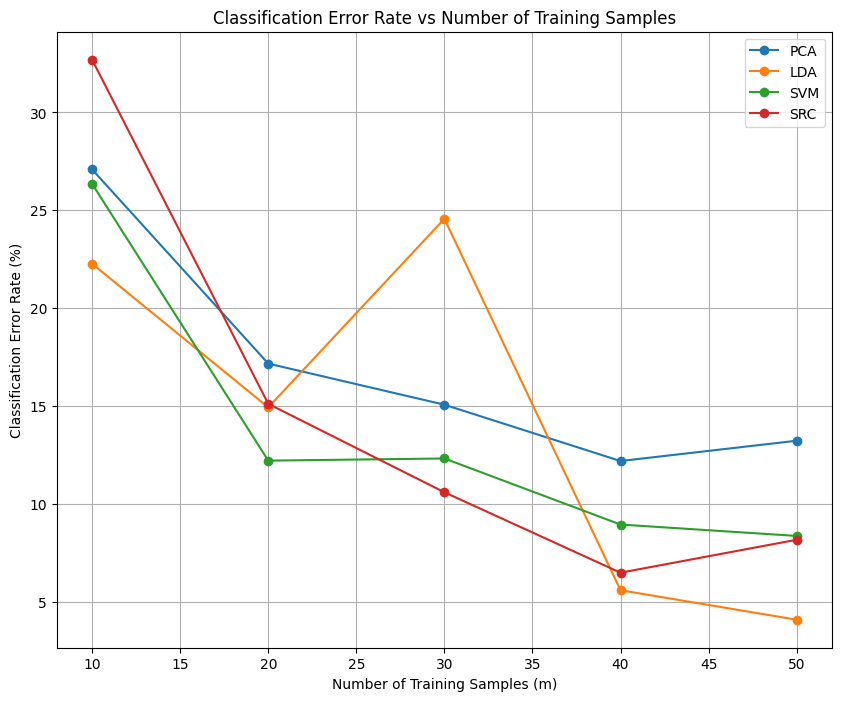

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for algorithm, errors in error_rates.items():
    plt.plot(m_values, errors, label=algorithm, marker='o')
plt.xlabel('Number of Training Samples (m)')
plt.ylabel('Classification Error Rate (%)')
plt.title('Classification Error Rate vs Number of Training Samples')
plt.legend()
plt.grid(True)
plt.show()


Based on the graph the effectiveness of the classifiers ranked from least to most effective is PCA, SVM, SRC, and LDA. All methods show improvement as the number of training samples increases, with LDA outperforming the others at 50 samples despite a peak in error rate at 35 samples. 

- **PCA** is used to reduce the dimensionality of the face images, emphasizing the variance and possibly losing some facial features that are important for classification.

- **LDA** seeks to reduce dimensions while preserving class separability, which generally makes it more suitable for classification tasks on face datasets, as it aims to maximize the between-class variance.

- **SVM** is a discriminative classifier that finds an optimal hyperplane which maximizes the margin between different classes. It is effective in high-dimensional spaces like face recognition.

- **SRC** works by representing a test face image as a sparse linear combination of training images. It classifies the test image based on the reconstruction error from each class, ideally suited for cases where face images can be linearly reconstructed from a dictionary of face images. 

Each method leverages unique aspects of the data, with LDA and SVM typically providing better class separation, and SRC offering a robust representation under various conditions, which can be particularly useful in face recognition tasks.